In [19]:
from google.colab import drive
import os, zipfile, sys, traceback

ZIP_PATH = "/content/drive/MyDrive/RMDS_Segmentation_Assignment.zip"
EXTRACT_TO = "/content/Extracted_RMDS/"

In [20]:
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)

Mounting Google Drive...
Mounted at /content/drive


In [21]:
print("\nChecking ZIP path...")
print("ZIP_PATH =", ZIP_PATH)
print("Exists:", os.path.exists(ZIP_PATH))


Checking ZIP path...
ZIP_PATH = /content/drive/MyDrive/RMDS_Segmentation_Assignment.zip
Exists: True


In [18]:
if not os.path.exists(DATA_DIR):
    if not os.path.exists(ZIP_PATH):
        print("ERROR: ZIP file not found at ZIP_PATH. Please check ZIP_PATH or upload RMDS_Segmentation_Assignment.zip to your Drive.")
        with zipfile.ZipFile(ZIP_PATH, 'r') as z:
            z.extractall("/content")
        print("Unzipped to /content")
else:
    print("Dataset already present at", DATA_DIR)

In [22]:
if not os.path.exists(ZIP_PATH):
    parent = os.path.dirname(ZIP_PATH)
    print("\nERROR: ZIP not found at ZIP_PATH.")
    if os.path.exists(parent):
        print("Contents of parent folder:", parent)
        print(sorted(os.listdir(parent))[:200])
    else:
        print("Parent path does not exist:", parent)
    raise FileNotFoundError(f"ZIP file not found at {ZIP_PATH}. Please check the path or re-upload the zip to Drive.")

In [23]:
zsize = os.path.getsize(ZIP_PATH)
print(f"\nFound ZIP ({zsize/1024/1024:.2f} MB). Showing first 200 entries inside the zip (or error if corrupted)...")

try:
    with zipfile.ZipFile(ZIP_PATH, 'r') as z:
        namelist = z.namelist()
        print("Number of entries in zip:", len(namelist))
        top_level = sorted({p.split('/')[0] for p in namelist})[:50]
        print("Top-level entries (sample):", top_level)
        print("\nFirst 50 file entries inside zip:")
        for i, n in enumerate(namelist[:50]):
            print(f" {i+1:03d}. {n}")
        print(f"\nExtracting zip to: {EXTRACT_TO} ...")
        os.makedirs(EXTRACT_TO, exist_ok=True)
        for member in namelist:
            target_path = os.path.join(EXTRACT_TO, member)
            parent_dir = os.path.dirname(target_path)
            if parent_dir and not os.path.exists(parent_dir):
                os.makedirs(parent_dir, exist_ok=True)
        z.extractall(EXTRACT_TO)
    print("Extraction finished.")
except zipfile.BadZipFile:
    print("ERROR: The zip file appears to be corrupted (BadZipFile). Try re-uploading the ZIP to Drive.")
    raise
except Exception as e:
    print("ERROR during zip processing:")
    traceback.print_exc()
    raise



Found ZIP (95.25 MB). Showing first 200 entries inside the zip (or error if corrupted)...
Number of entries in zip: 1276
Top-level entries (sample): ['__MACOSX', 'test-30', 'train-300', 'validation-300']

First 50 file entries inside zip:
 001. test-30/
 002. __MACOSX/._test-30
 003. test-30/000000372349.jpg
 004. __MACOSX/test-30/._000000372349.jpg
 005. test-30/000000156292.jpg
 006. __MACOSX/test-30/._000000156292.jpg
 007. test-30/000000305317.jpg
 008. __MACOSX/test-30/._000000305317.jpg
 009. test-30/000000489764.jpg
 010. __MACOSX/test-30/._000000489764.jpg
 011. test-30/000000449579.jpg
 012. __MACOSX/test-30/._000000449579.jpg
 013. test-30/000000380913.jpg
 014. __MACOSX/test-30/._000000380913.jpg
 015. test-30/000000050380.jpg
 016. __MACOSX/test-30/._000000050380.jpg
 017. test-30/000000013291.jpg
 018. __MACOSX/test-30/._000000013291.jpg
 019. test-30/000000441442.jpg
 020. __MACOSX/test-30/._000000441442.jpg
 021. test-30/000000233771.jpg
 022. __MACOSX/test-30/._0000002

In [24]:
print("\nExtracted folder tree (top 2 levels):")
for root, dirs, files in os.walk(EXTRACT_TO):
    depth = root.replace(EXTRACT_TO, "").count(os.sep)
    if depth <= 1:
        print("\nDir:", root)
        if dirs:
            print("  Subdirs:", dirs)
        if files:
            print("  Files (first 30):", files[:30])

def count_images(path):
    cnt = 0
    for dp, dn, fn in os.walk(path):
        for f in fn:
            if f.lower().endswith(('.jpg','.jpeg','.png')):
                cnt += 1
    return cnt

print("\nImage counts in extracted tree (approx):")
print("Total images under EXTRACT_TO:", count_images(EXTRACT_TO))


Extracted folder tree (top 2 levels):

Dir: /content/Extracted_RMDS/
  Subdirs: ['__MACOSX', 'test-30', 'validation-300', 'train-300']

Dir: /content/Extracted_RMDS/__MACOSX
  Subdirs: ['test-30', 'validation-300', 'train-300']
  Files (first 30): ['._train-300', '._validation-300', '._test-30']

Dir: /content/Extracted_RMDS/__MACOSX/test-30
  Files (first 30): ['._000000443844.jpg', '._000000372349.jpg', '._000000449579.jpg', '._000000273711.jpg', '._000000413552.jpg', '._000000574297.jpg', '._000000441442.jpg', '._000000427655.jpg', '._000000117525.jpg', '._000000364297.jpg', '._000000156292.jpg', '._000000292415.jpg', '._000000143556.jpg', '._000000456496.jpg', '._000000489764.jpg', '._000000169356.jpg', '._000000079969.jpg', '._000000491366.jpg', '._000000380913.jpg', '._000000153011.jpg', '._000000066771.jpg', '._000000281409.jpg', '._000000233771.jpg', '._000000013177.jpg', '._000000125850.jpg', '._000000050380.jpg', '._000000161032.jpg', '._000000013291.jpg', '._000000305317.jp

In [25]:
sample_images = []
for dp, dn, files in os.walk(EXTRACT_TO):
    for f in files:
        if f.lower().endswith(('.jpg','.jpeg','.png')):
            sample_images.append(os.path.join(dp, f))
            if len(sample_images) >= 5:
                break
    if len(sample_images) >= 5:
        break

if sample_images:
    print("\nSample image paths:")
    for p in sample_images:
        print(" ", p)
else:
    print("\nNo images found in extracted folder. Check zip contents above.")


Sample image paths:
  /content/Extracted_RMDS/__MACOSX/test-30/._000000443844.jpg
  /content/Extracted_RMDS/__MACOSX/test-30/._000000372349.jpg
  /content/Extracted_RMDS/__MACOSX/test-30/._000000449579.jpg
  /content/Extracted_RMDS/__MACOSX/test-30/._000000273711.jpg
  /content/Extracted_RMDS/__MACOSX/test-30/._000000413552.jpg


In [26]:
import os, json

TRAIN_ROOT = "/content/Extracted_RMDS/train-300"
VAL_ROOT   = "/content/Extracted_RMDS/validation-300"
TEST_ROOT  = "/content/Extracted_RMDS/test-30"

def walk_top(root, max_depth=3):
    print(f"\n Listing for: {root}")
    for dirpath, dirnames, filenames in os.walk(root):
        depth = dirpath.replace(root, "").count(os.sep)
        if depth <= max_depth:
            print(f"\nDir: {dirpath}")
            if dirnames:
                print("  Subdirs:", dirnames)
            if filenames:
                print("  Files (first 30):", filenames[:30])
        else:
            break

In [27]:
walk_top(TRAIN_ROOT, max_depth=2)
walk_top(VAL_ROOT, max_depth=2)
walk_top(TEST_ROOT, max_depth=1)


 Listing for: /content/Extracted_RMDS/train-300

Dir: /content/Extracted_RMDS/train-300
  Subdirs: ['data']
  Files (first 30): ['.DS_Store', 'labels.json']

Dir: /content/Extracted_RMDS/train-300/data
  Files (first 30): ['000000230983.jpg', '000000257865.jpg', '000000210299.jpg', '000000327617.jpg', '000000475572.jpg', '000000292024.jpg', '000000410880.jpg', '000000093353.jpg', '000000373705.jpg', '000000318238.jpg', '000000579070.jpg', '000000319721.jpg', '000000364102.jpg', '000000331280.jpg', '000000554328.jpg', '000000281032.jpg', '000000166521.jpg', '000000266409.jpg', '000000013348.jpg', '000000441468.jpg', '000000377393.jpg', '000000316054.jpg', '000000334530.jpg', '000000145020.jpg', '000000181666.jpg', '000000451435.jpg', '000000546823.jpg', '000000073153.jpg', '000000104666.jpg', '000000457848.jpg']

 Listing for: /content/Extracted_RMDS/validation-300

Dir: /content/Extracted_RMDS/validation-300
  Subdirs: ['data']
  Files (first 30): ['.DS_Store', 'labels.json']

Dir: /c

In [28]:
def find_images(root):
    imgs = []
    for dp, dn, files in os.walk(root):
        for f in files:
            if f.lower().endswith(('.jpg','.jpeg','.png')):
                imgs.append(os.path.join(dp, f))
    return imgs

In [29]:
train_images = find_images(TRAIN_ROOT)
val_images = find_images(VAL_ROOT)
test_images = find_images(TEST_ROOT)

print(f"\nCounts -> train images: {len(train_images)}, val images: {len(val_images)}, test images: {len(test_images)}")
if len(train_images)>0:
    print("First 10 train image paths:")
    for p in train_images[:10]:
        print(" ", p)


Counts -> train images: 300, val images: 300, test images: 30
First 10 train image paths:
  /content/Extracted_RMDS/train-300/data/000000230983.jpg
  /content/Extracted_RMDS/train-300/data/000000257865.jpg
  /content/Extracted_RMDS/train-300/data/000000210299.jpg
  /content/Extracted_RMDS/train-300/data/000000327617.jpg
  /content/Extracted_RMDS/train-300/data/000000475572.jpg
  /content/Extracted_RMDS/train-300/data/000000292024.jpg
  /content/Extracted_RMDS/train-300/data/000000410880.jpg
  /content/Extracted_RMDS/train-300/data/000000093353.jpg
  /content/Extracted_RMDS/train-300/data/000000373705.jpg
  /content/Extracted_RMDS/train-300/data/000000318238.jpg


In [30]:
def summarize_json(json_path):
    print(f"\n--- Summary of {json_path} ---")
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except Exception as e:
        print("Could not load JSON:", e)
        return None
    print("Top-level keys:", list(data.keys())[:20])
    for k in ['images','annotations','categories','labels','objects','items']:
        if k in data:
            print(f"Key '{k}': type={type(data[k])}, len={len(data[k]) if hasattr(data[k],'__len__') else 'NA'}")
    for k in ['images','annotations','labels','objects','categories','items']:
        if k in data:
            sample = data[k][0] if isinstance(data[k], list) and len(data[k])>0 else None
            print(f"\nSample from '{k}':")
            from pprint import pprint
            pprint(sample)
            break
    return data

In [31]:
train_json_path = os.path.join(TRAIN_ROOT, "data", "labels.json")
val_json_path   = os.path.join(VAL_ROOT,   "data", "labels.json")

if os.path.exists(train_json_path):
    train_json = summarize_json(train_json_path)
else:
    print("\ntrain labels.json not found at", train_json_path)

if os.path.exists(val_json_path):
    val_json = summarize_json(val_json_path)
else:
    print("\nval labels.json not found at", val_json_path)


train labels.json not found at /content/Extracted_RMDS/train-300/data/labels.json

val labels.json not found at /content/Extracted_RMDS/validation-300/data/labels.json


In [32]:
import os, json
from collections import Counter, defaultdict

TRAIN_ROOT = "/content/Extracted_RMDS/train-300"
VAL_ROOT   = "/content/Extracted_RMDS/validation-300"

In [33]:
def find_json_in_root(root):
    candidates = []
    for f in os.listdir(root):
        if f.lower().endswith('.json'):
            candidates.append(os.path.join(root, f))
    for dp, dn, files in os.walk(root):
        if dp == root: continue
        for f in files:
            if f.lower().endswith('.json'):
                candidates.append(os.path.join(dp, f))
    return list(dict.fromkeys(candidates))

In [34]:
train_jsons = find_json_in_root(TRAIN_ROOT)
val_jsons = find_json_in_root(VAL_ROOT)
print("Found train jsons:", train_jsons)
print("Found val jsons:  ", val_jsons)

Found train jsons: ['/content/Extracted_RMDS/train-300/labels.json']
Found val jsons:   ['/content/Extracted_RMDS/validation-300/labels.json']


In [35]:
def load_json(path):
    print(f"\n Loading json: {path}")
    with open(path,'r') as f:
        data = json.load(f)
    print("Top-level keys:", list(data.keys()))
    for k in ['images','annotations','categories','labels','objects','items']:
        if k in data:
            print(f"Key '{k}': type={type(data[k])}, len={len(data[k]) if hasattr(data[k],'__len__') else 'NA'}")
    sample_keys = ['images','annotations','categories','labels','objects','items']
    for k in sample_keys:
        if k in data and isinstance(data[k], list) and len(data[k])>0:
            print(f"\nSample from '{k}':")
            import pprint
            pprint.pprint(data[k][:2])
    return data

In [36]:
train_json = None
val_json = None
if train_jsons:
    train_json = load_json(train_jsons[0])
else:
    print("No train json found")

if val_jsons:
    val_json = load_json(val_jsons[0])
else:
    print("No val json found")


--- Loading json: /content/Extracted_RMDS/train-300/labels.json ---
Top-level keys: ['info', 'licenses', 'categories', 'images', 'annotations']
Key 'images': type=<class 'list'>, len=300
Key 'annotations': type=<class 'list'>, len=2715
Key 'categories': type=<class 'list'>, len=80

Sample from 'images':
[{'coco_url': 'http://images.cocodataset.org/val2017/000000538364.jpg',
  'date_captured': '2013-11-15 19:00:10',
  'file_name': '000000538364.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8042/7933423348_c30bd9bd4e_z.jpg',
  'height': 480,
  'id': 538364,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000236166.jpg',
  'date_captured': '2013-11-17 03:44:11',
  'file_name': '000000236166.jpg',
  'flickr_url': 'http://farm6.staticflickr.com/5235/5907035871_a3eb87eb96_z.jpg',
  'height': 640,
  'id': 236166,
  'license': 1,
  'width': 426}]

Sample from 'annotations':
[{'area': 702.1057499999998,
  'bbox': [473.07, 395.93, 38.65, 28.67],
 

In [39]:
def summarize_annotations(data, root_name="train"):
    print(f"\n Summarizing annotation structure for {root_name}")
    if 'images' in data and isinstance(data['images'], list):
        print("Found 'images' list. Showing keys of first image:", list(data['images'][0].keys()))
    if 'annotations' in data and isinstance(data['annotations'], list):
        print("Found 'annotations' list. Showing keys of first annotation:", list(data['annotations'][0].keys()))
    cats = []
    if 'categories' in data:
        for c in data['categories']:
            cats.append(c.get('name', c.get('label', c.get('category', str(c))))
                       )
    elif 'labels' in data:
        if isinstance(data['labels'], dict):
            cats = list(data['labels'].values())
        elif isinstance(data['labels'], list):
            cats = [str(x) for x in data['labels']]
    elif 'objects' in data and isinstance(data['objects'], list):
        pass
    print("Detected categories (sample):", cats[:50])
    return cats

In [40]:
train_cats = summarize_annotations(train_json, "train") if train_json else []
val_cats = summarize_annotations(val_json, "val") if val_json else []

TARGET = ['person','cat','sports ball','book']
print("\nTarget classes:", TARGET)


 Summarizing annotation structure for train
Found 'images' list. Showing keys of first image: ['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']
Found 'annotations' list. Showing keys of first annotation: ['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']
Detected categories (sample): ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange']

 Summarizing annotation structure for val
Found 'images' list. Showing keys of first image: ['license', 

In [41]:
def count_target_images(data, root_folder):
    imgid_to_fname = {}
    results = defaultdict(list)
    if 'images' in data and 'annotations' in data:
        for im in data['images']:
            img_id = im.get('id', im.get('image_id', im.get('img_id')))
            fname = im.get('file_name', im.get('filename', im.get('name')))
            if fname is None:
                fname = os.path.basename(im.get('coco_url','') or im.get('url','') or "")
            imgid_to_fname[img_id] = fname
        catid_to_name = {}
        if 'categories' in data:
            for c in data['categories']:
                catid_to_name[c.get('id')] = c.get('name') or c.get('label') or str(c)
        for ann in data['annotations']:
            cat = None
            if 'category_id' in ann:
                cat = catid_to_name.get(ann['category_id'], None)
            elif 'label' in ann:
                cat = ann.get('label')
            elif 'category' in ann:
                cat = ann.get('category')
            if cat is None:
                for k in ['category_name','class','class_name','label']:
                    if k in ann:
                        cat = ann[k]
                        break
            fname = imgid_to_fname.get(ann.get('image_id') or ann.get('image'), None)
            if fname is None:
                fname = ann.get('file_name') or ann.get('image_id') or None
            if cat and fname:
                for t in TARGET:
                    if str(cat).lower() == t:
                        results[t].append(fname)
    else:
        if isinstance(data, list):
            for entry in data:
                fname = entry.get('image') or entry.get('file') or entry.get('filename') or entry.get('image_path')
                objs = entry.get('objects') or entry.get('annotations') or entry.get('labels') or entry.get('instances')
                if objs:
                    for obj in objs:
                        name = obj.get('label') or obj.get('category') or obj.get('class') or obj.get('name')
                        if name:
                            for t in TARGET:
                                if str(name).lower() == t:
                                    results[t].append(fname)
        else:
            for key in ['items','objects','labels']:
                if key in data and isinstance(data[key], list):
                    for entry in data[key]:
                        fname = entry.get('image') or entry.get('file') or entry.get('filename') or entry.get('name')
                        objs = entry.get('objects') or entry.get('annotations') or entry.get('labels') or entry.get('instances')
                        if objs:
                            for obj in objs:
                                name = obj.get('label') or obj.get('category') or obj.get('class') or obj.get('name')
                                if name:
                                    for t in TARGET:
                                        if str(name).lower() == t:
                                            results[t].append(fname)

    for k in list(results.keys()):
        results[k] = sorted(list(set([r for r in results[k] if r])))
    counts = {k: len(v) for k,v in results.items()}
    print("Counts of images containing each target class (detected):", counts)
    for k,v in results.items():
        print(f"\nSample files for '{k}' ({len(v)}):", v[:8])
    return results

train_target_results = count_target_images(train_json, TRAIN_ROOT) if train_json else {}
val_target_results = count_target_images(val_json, VAL_ROOT) if val_json else {}

Counts of images containing each target class (detected): {'cat': 25, 'person': 264, 'book': 26, 'sports ball': 13}

Sample files for 'cat' (25): ['000000014007.jpg', '000000018833.jpg', '000000077396.jpg', '000000101420.jpg', '000000116825.jpg', '000000118515.jpg', '000000131131.jpg', '000000153217.jpg']

Sample files for 'person' (264): ['000000004134.jpg', '000000005001.jpg', '000000005193.jpg', '000000006894.jpg', '000000006954.jpg', '000000012120.jpg', '000000012576.jpg', '000000012748.jpg']

Sample files for 'book' (26): ['000000037740.jpg', '000000077396.jpg', '000000091615.jpg', '000000093353.jpg', '000000096001.jpg', '000000104666.jpg', '000000109313.jpg', '000000123633.jpg']

Sample files for 'sports ball' (13): ['000000012120.jpg', '000000025424.jpg', '000000031217.jpg', '000000039405.jpg', '000000132544.jpg', '000000177065.jpg', '000000316404.jpg', '000000383384.jpg']
Counts of images containing each target class (detected): {'cat': 20, 'person': 268, 'book': 25, 'sports ba

In [42]:
import os, json, numpy as np
from PIL import Image, ImageDraw
import torch
from torch.utils.data import Dataset, DataLoader
import random
from collections import defaultdict

ROOT = "/content/Extracted_RMDS"
TRAIN_ROOT = os.path.join(ROOT, "train-300")
VAL_ROOT   = os.path.join(ROOT, "validation-300")
TEST_ROOT  = os.path.join(ROOT, "test-30")

TRAIN_JSON = os.path.join(TRAIN_ROOT, "labels.json") if os.path.exists(os.path.join(TRAIN_ROOT, "labels.json")) else os.path.join(TRAIN_ROOT, "data", "labels.json")
VAL_JSON   = os.path.join(VAL_ROOT, "labels.json") if os.path.exists(os.path.join(VAL_ROOT, "labels.json")) else os.path.join(VAL_ROOT, "data", "labels.json")

print("Using train json:", TRAIN_JSON)
print("Using val json:  ", VAL_JSON)

with open(TRAIN_JSON,'r') as f:
    train_ann = json.load(f)
with open(VAL_JSON,'r') as f:
    val_ann = json.load(f)

print("\nTop-level keys in train json:", list(train_ann.keys())[:20])

Using train json: /content/Extracted_RMDS/train-300/labels.json
Using val json:   /content/Extracted_RMDS/validation-300/labels.json

Top-level keys in train json: ['info', 'licenses', 'categories', 'images', 'annotations']


In [43]:
def build_maps(ann):
    id2img = {}
    fname2id = {}
    if 'images' in ann:
        for im in ann['images']:
            im_id = im.get('id')
            fname = im.get('file_name') or im.get('filename') or im.get('name') or im.get('image')
            if not fname:
                fname = os.path.basename(im.get('coco_url','') or im.get('url','') or "")
            id2img[im_id] = im
            fname2id[fname] = im_id
    catid2name = {}
    if 'categories' in ann:
        for c in ann['categories']:
            catid2name[c.get('id')] = c.get('name')
    ann_by_img = defaultdict(list)
    if 'annotations' in ann:
        for a in ann['annotations']:
            imgid = a.get('image_id') or a.get('image')
            ann_by_img[imgid].append(a)
    else:
        if 'items' in ann or 'labels' in ann or 'objects' in ann:
            key = 'items' if 'items' in ann else ('labels' if 'labels' in ann else 'objects')
            for item in ann[key]:
                fname = item.get('image') or item.get('file_name') or item.get('filename') or item.get('name')
                objs = item.get('objects') or item.get('annotations') or item.get('labels')
                if fname and objs:
                    imgid = fname2id.get(fname, fname)
                    for o in objs:
                        ann_by_img[imgid].append(o)
    return id2img, fname2id, catid2name, ann_by_img

train_id2img, train_fname2id, train_catid2name, train_ann_by_img = build_maps(train_ann)
val_id2img, val_fname2id, val_catid2name, val_ann_by_img = build_maps(val_ann)

print("Sample image meta keys (train):", list(next(iter(train_id2img.values())).keys()) if train_id2img else "No images found")
print("Sample category mapping (train):", list(train_catid2name.items())[:10])

Sample image meta keys (train): ['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']
Sample category mapping (train): [(1, 'person'), (2, 'bicycle'), (3, 'car'), (4, 'motorcycle'), (5, 'airplane'), (6, 'bus'), (7, 'train'), (8, 'truck'), (9, 'boat'), (10, 'traffic light')]


In [44]:
TARGET = ['person','cat','sports ball','book']
TARGET_SET = set(TARGET)

def images_with_targets(ann, ann_by_img, id2img, fname2id):
    filenames = set()
    for imgid, anns in ann_by_img.items():
        for a in anns:
            cname = None
            if 'category_id' in a:
                cname = (train_catid2name if ann is train_ann else val_catid2name).get(a['category_id'])
            if cname is None:
                for k in ['category','label','class','name']:
                    if k in a:
                        cname = a[k]
                        break
            if cname and cname.lower() in TARGET_SET:
                imgmeta = id2img.get(imgid)
                if imgmeta:
                    fname = imgmeta.get('file_name') or imgmeta.get('filename') or imgmeta.get('name')
                else:
                    fname = imgid
                if fname:
                    filenames.add(fname)
    return sorted(list(filenames))

In [45]:
train_files = images_with_targets(train_ann, train_ann_by_img, train_id2img, train_fname2id)
val_files = images_with_targets(val_ann, val_ann_by_img, val_id2img, val_fname2id)
print(f"\nDetected {len(train_files)} train images with target classes, {len(val_files)} val images with target classes")


Detected 300 train images with target classes, 300 val images with target classes


In [46]:
class RMDSDataset(Dataset):
    def __init__(self, root_images_folder, ann, id2img, ann_by_img, file_list, transform=None):
        self.root = root_images_folder
        self.ann = ann
        self.id2img = id2img
        self.ann_by_img = ann_by_img
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def _build_mask_from_segmentation(self, seg, height, width):
        """
        seg can be:
          - polygon: list of list of x,y
          - rle: dict with 'counts' and 'size' (we won't handle compressed RLE here)
        """
        mask = Image.new('L', (width, height), 0)
        draw = ImageDraw.Draw(mask)
        if isinstance(seg, list):
            for poly in seg:
                if len(poly) < 6:
                    continue
                xy = [(poly[i], poly[i+1]) for i in range(0, len(poly), 2)]
                draw.polygon(xy, outline=1, fill=1)
        elif isinstance(seg, dict):
            return np.zeros((height, width), dtype=np.uint8)
        else:
            return np.zeros((height, width), dtype=np.uint8)
        return np.array(mask, dtype=np.uint8)

    def __getitem__(self, idx):
        fname = self.files[idx]
        img_id = train_fname2id.get(fname) or val_fname2id.get(fname) or None
        imgmeta = self.id2img.get(img_id) if img_id is not None else None
        if os.path.exists(os.path.join(TRAIN_ROOT, "data", fname)):
            img_path = os.path.join(TRAIN_ROOT, "data", fname)
        elif os.path.exists(os.path.join(VAL_ROOT, "data", fname)):
            img_path = os.path.join(VAL_ROOT, "data", fname)
        else:
            cand = os.path.join(TRAIN_ROOT, fname)
            if os.path.exists(cand):
                img_path = cand
            else:
                raise FileNotFoundError("Image not found: " + fname)
        img = Image.open(img_path).convert("RGB")
        width, height = img.size

        anns = []
        if img_id in self.ann_by_img:
            anns = self.ann_by_img[img_id]
        else:
            anns = self.ann_by_img.get(fname, [])

        masks = []
        boxes = []
        labels = []
        for a in anns:
            cname = None
            if 'category_id' in a:
                cname = (train_catid2name if self.ann is train_ann else val_catid2name).get(a['category_id'])
            if cname is None:
                for k in ['category','label','class','name']:
                    if k in a:
                        cname = a[k]
                        break
            if not cname:
                continue
            cname_l = cname.lower()
            if cname_l not in TARGET_SET:
                continue
            seg = a.get('segmentation') or a.get('seg') or a.get('mask')
            if seg:
                m = self._build_mask_from_segmentation(seg, height, width)
            else:
                bbox = a.get('bbox')
                if bbox:
                    x,y,w,h = bbox
                    m = np.zeros((height, width), dtype=np.uint8)
                    x1,y1,x2,y2 = int(x), int(y), int(x+w), int(y+h)
                    x1,x2 = max(0,x1), min(width-1,x2)
                    y1,y2 = max(0,y1), min(height-1,y2)
                    m[y1:y2, x1:x2] = 1
                else:
                    continue
            masks.append(m)
            if 'bbox' in a and a.get('bbox'):
                x,y,w,h = a['bbox']
                boxes.append([x, y, x+w, y+h])
            else:
                ys, xs = np.where(m>0)
                if len(xs)>0:
                    boxes.append([float(xs.min()), float(ys.min()), float(xs.max()), float(ys.max())])
                else:
                    boxes.append([0.0,0.0,0.0,0.0])
            labels.append(TARGET.index(cname_l)+1)  # 1..N

        target = {}
        if len(boxes)>0:
            target['boxes'] = torch.as_tensor(np.array(boxes), dtype=torch.float32)
            target['labels'] = torch.as_tensor(np.array(labels), dtype=torch.int64)
            target['masks'] = torch.as_tensor(np.stack(masks, axis=0), dtype=torch.uint8)
        else:
            target['boxes'] = torch.zeros((0,4), dtype=torch.float32)
            target['labels'] = torch.zeros((0,), dtype=torch.int64)
            target['masks'] = torch.zeros((0, height, width), dtype=torch.uint8)

        img_t = transforms.ToTensor()(img)

        if self.transform is not None:
            img_t, masks_t = self.transform(np.array(img), [m for m in masks] if len(masks)>0 else None)
            target['masks'] = masks_t
            boxes_new = []
            for m in masks_t.numpy():
                ys, xs = np.where(m>0)
                if len(xs)>0:
                    boxes_new.append([float(xs.min()), float(ys.min()), float(xs.max()), float(ys.max())])
                else:
                    boxes_new.append([0.0,0.0,0.0,0.0])
            target['boxes'] = torch.as_tensor(np.array(boxes_new), dtype=torch.float32)

        target['image_id'] = torch.tensor([idx])

        return img_t, target

In [47]:
try:
    train_transform
    val_transform
    print("Detected train_transform in namespace -- using it.")
except NameError:
    from torchvision import transforms as T
    class TinyResizeTransform:
        def __init__(self, size=(512,512)):
            self.size = size
            self.to_tensor = T.ToTensor()
        def __call__(self, image, masks=None):
            from PIL import Image
            im = Image.fromarray(image).resize(self.size, resample=Image.BILINEAR)
            img_t = self.to_tensor(im)
            new_masks = []
            if masks:
                for m in masks:
                    mimg = Image.fromarray((m*255).astype('uint8')).resize(self.size, resample=Image.NEAREST)
                    new_masks.append((np.array(mimg)>127).astype(np.uint8))
            if len(new_masks)>0:
                masks_t = torch.as_tensor(np.stack(new_masks,axis=0), dtype=torch.uint8)
            else:
                masks_t = torch.zeros((0,self.size[1],self.size[0]), dtype=torch.uint8)
            return img_t, masks_t
    train_transform = TinyResizeTransform((512,512))
    val_transform = TinyResizeTransform((512,512))
    print("Using TinyResizeTransform.")


Using TinyResizeTransform.


In [48]:
train_dataset = RMDSDataset(os.path.join(TRAIN_ROOT,"data"), train_ann, train_id2img, train_ann_by_img, train_files, transform=train_transform)
val_dataset   = RMDSDataset(os.path.join(VAL_ROOT,"data"), val_ann, val_id2img, val_ann_by_img, val_files, transform=val_transform)

print("\nDataset sizes -> train:", len(train_dataset), " val:", len(val_dataset))


Dataset sizes -> train: 300  val: 300


In [49]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

import matplotlib.pyplot as plt

def overlay_and_show(img_tensor, masks_t, title=None):
    img = (img_tensor.permute(1,2,0).numpy()*255).astype('uint8')
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    ax = plt.gca()
    if masks_t is not None and masks_t.shape[0]>0:
        for i in range(min(8, masks_t.shape[0])):
            m = masks_t[i].numpy()
            colored = np.zeros((m.shape[0], m.shape[1], 4), dtype=np.uint8)
            colored[m==1] = [255,0,0,100]
            ax.imshow(colored)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

Sample idx 271 - boxes shape torch.Size([2, 4]) labels torch.Size([2]) masks torch.Size([2, 512, 512])


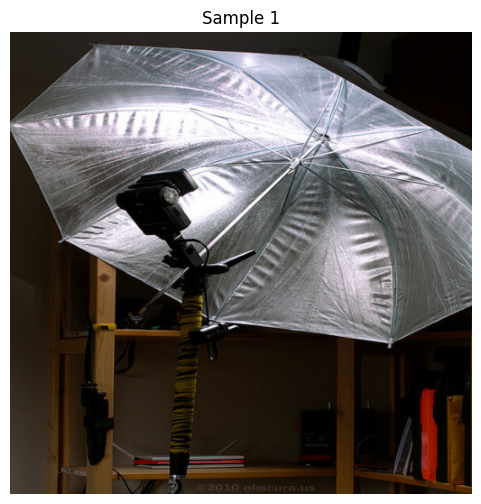

Sample idx 138 - boxes shape torch.Size([2, 4]) labels torch.Size([2]) masks torch.Size([2, 512, 512])


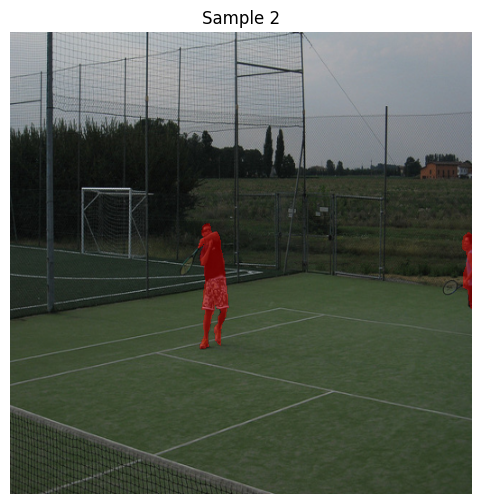

Sample idx 256 - boxes shape torch.Size([1, 4]) labels torch.Size([1]) masks torch.Size([1, 512, 512])


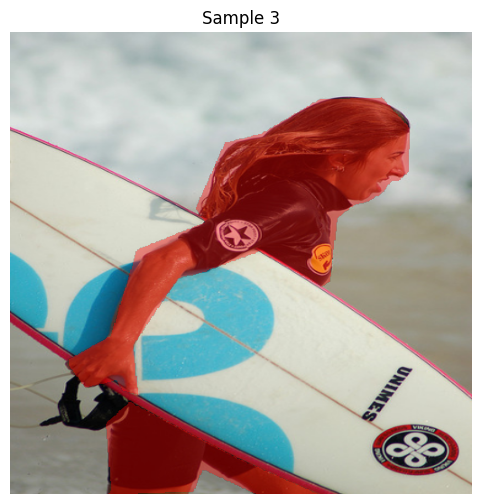

In [52]:
from torchvision import transforms
for i in range(3):
    idx = random.randint(0, len(train_dataset)-1)
    img_t, target = train_dataset[idx]
    print(f"Sample idx {idx} - boxes shape {target['boxes'].shape} labels {target['labels'].shape} masks {target['masks'].shape}")
    overlay_and_show(img_t, target['masks'], title=f"Sample {i+1}")

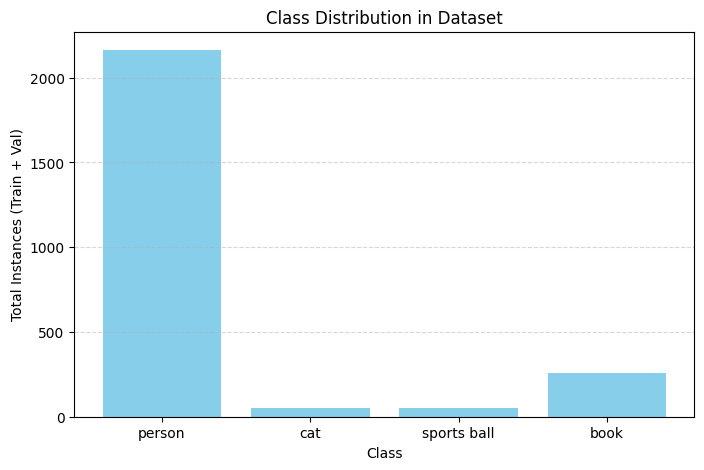

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def count_instances(annotation_data, target_classes):
    catid_to_name = {}
    for c in annotation_data["categories"]:
        catid_to_name[c["id"]] = c["name"].lower()

    counts = {cls: 0 for cls in target_classes}

    for ann in annotation_data["annotations"]:
        cname = catid_to_name.get(ann["category_id"], None)
        if cname in target_classes:
            counts[cname] += 1

    return counts

train_counts = count_instances(train_json, TARGET)
val_counts   = count_instances(val_json, TARGET)

total_counts = {cls: train_counts[cls] + val_counts[cls] for cls in TARGET}

plt.figure(figsize=(8,5))
plt.bar(total_counts.keys(), total_counts.values(), color='skyblue')
plt.title("Class Distribution in Dataset")
plt.xlabel("Class")
plt.ylabel("Total Instances (Train + Val)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [57]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [58]:
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn

NUM_CLASSES = 1 + 4

print("Building Mask R-CNN…")

model = maskrcnn_resnet50_fpn(pretrained=True)

in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = \
    torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, NUM_CLASSES)

in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = \
    torchvision.models.detection.mask_rcnn.MaskRCNNPredictor(in_features_mask,
                                                             hidden_layer,
                                                             NUM_CLASSES)

model.to(device)

print("Mask R-CNN built and moved to:", device)

Building Mask R-CNN…
✓ Mask R-CNN built and moved to: cuda


In [59]:
import torch
import numpy as np
import time

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params,
                            lr=0.005,
                            momentum=0.9,
                            weight_decay=0.0005)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=4,
                                               gamma=0.1)

In [60]:
def train_one_epoch(model, data_loader, optimizer, device, epoch, print_freq=40):
    model.train()
    total_loss = []

    start_time = time.time()

    for i, (images, targets) in enumerate(data_loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss.append(loss.item())

        if (i + 1) % print_freq == 0:
            print(f"Epoch [{epoch}] Iter [{i+1}/{len(data_loader)}] "
                  f"Loss: {loss.item():.4f}")

    epoch_loss = np.mean(total_loss)
    time_taken = time.time() - start_time

    print(f"\nEpoch {epoch} Summary:")
    print(f"  Avg Loss = {epoch_loss:.4f}")
    print(f"  Time     = {time_taken:.1f} sec")

    return epoch_loss

In [63]:
import torch
import numpy as np
import time

def clean_targets(images, targets, min_box_wh=1):
    """
    Remove invalid objects (zero-area boxes or empty masks) from targets.
    Returns cleaned lists (images_clean, targets_clean) and counts of removals.
    """
    cleaned_images = []
    cleaned_targets = []
    removed_images = 0
    removed_objects = 0

    for img, tgt in zip(images, targets):
        if 'boxes' not in tgt or 'labels' not in tgt:
            removed_images += 1
            continue
        boxes = tgt['boxes']
        labels = tgt['labels']
        masks = tgt.get('masks', None)

        if boxes.numel() == 0:
            removed_images += 1
            continue

        ws = boxes[:,2] - boxes[:,0]
        hs = boxes[:,3] - boxes[:,1]
        valid_box_mask = (ws > min_box_wh) & (hs > min_box_wh)

        if masks is not None and masks.numel() > 0:
            mask_areas = masks.view(masks.shape[0], -1).sum(dim=1)
            valid_mask_mask = mask_areas > 0
            valid_mask = valid_box_mask & valid_mask_mask
        else:
            valid_mask = valid_box_mask

        removed_objects += int((~valid_mask).sum().item())

        keep_idx = torch.nonzero(valid_mask).squeeze(1) if valid_mask.sum()>0 else torch.tensor([], dtype=torch.long)
        if keep_idx.numel() == 0:
            removed_images += 1
            continue

        new_t = {}
        new_t['boxes'] = boxes[keep_idx].clone()
        new_t['labels'] = labels[keep_idx].clone()
        if masks is not None and masks.numel() > 0:
            new_t['masks'] = masks[keep_idx].clone()
        if 'image_id' in tgt:
            new_t['image_id'] = tgt['image_id']
        if 'area' in tgt:
            new_t['area'] = tgt['area'][keep_idx] if tgt['area'].numel()>0 else tgt.get('area', None)
        if 'iscrowd' in tgt:
            new_t['iscrowd'] = tgt['iscrowd'][keep_idx] if tgt['iscrowd'].numel()>0 else tgt.get('iscrowd', None)

        cleaned_images.append(img)
        cleaned_targets.append(new_t)

    return cleaned_images, cleaned_targets, removed_images, removed_objects

In [64]:
def train_one_epoch_clean(model, data_loader, optimizer, device, epoch, print_freq=40):
    model.train()
    total_loss = []
    total_iters = 0
    total_removed_images = 0
    total_removed_objects = 0
    start_time = time.time()

    for i, (images, targets) in enumerate(data_loader):
        images_clean, targets_clean, rem_imgs, rem_objs = clean_targets(
            images, targets, min_box_wh=1
        )
        total_removed_images += rem_imgs
        total_removed_objects += rem_objs

        if len(images_clean) == 0:
            if (i+1) % print_freq == 0:
                print(f"Iter {i+1}/{len(data_loader)}: skipped batch (no valid objects after cleaning).")
            continue

        images_dev = [img.to(device) for img in images_clean]
        targets_dev = [{k: v.to(device) for k,v in t.items()} for t in targets_clean]

        loss_dict = model(images_dev, targets_dev)
        loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss.append(loss.item())
        total_iters += 1

        if (i+1) % print_freq == 0:
            avg_recent = np.mean(total_loss[-print_freq:]) if len(total_loss)>0 else 0.0
            print(f"Epoch [{epoch}] Iter [{i+1}/{len(data_loader)}] Loss: {loss.item():.4f} AvgRecent: {avg_recent:.4f}")

    epoch_loss = np.mean(total_loss) if len(total_loss)>0 else 0.0
    time_taken = time.time() - start_time

    print(f"\nEpoch {epoch} Summary:")
    print(f"  Avg Loss        = {epoch_loss:.4f}")
    print(f"  Time (s)        = {time_taken:.1f}")
    print(f"  Removed images  = {total_removed_images}")
    print(f"  Removed objects = {total_removed_objects}")

    return epoch_loss

In [65]:
NUM_EPOCHS = 6
for epoch in range(1, NUM_EPOCHS+1):
    print(f"\nEPOCH {epoch}")
    train_loss = train_one_epoch_clean(model, train_loader, optimizer, device, epoch, print_freq=40)
    lr_scheduler.step()
    ckpt_path = f"/content/maskrcnn_epoch_clean_{epoch}.pth"
    torch.save(model.state_dict(), ckpt_path)
    print("Saved:", ckpt_path)


EPOCH 1
Epoch [1] Iter [40/150] Loss: 0.4738 AvgRecent: 1.0900
Epoch [1] Iter [80/150] Loss: 1.0788 AvgRecent: 0.8261
Epoch [1] Iter [120/150] Loss: 0.9918 AvgRecent: 0.8865

Epoch 1 Summary:
  Avg Loss        = 0.9172
  Time (s)        = 72.9
  Removed images  = 0
  Removed objects = 31
Saved: /content/maskrcnn_epoch_clean_1.pth

EPOCH 2
Epoch [2] Iter [40/150] Loss: 0.9468 AvgRecent: 0.6558
Epoch [2] Iter [80/150] Loss: 0.3052 AvgRecent: 0.7252
Epoch [2] Iter [120/150] Loss: 0.8708 AvgRecent: 0.7163

Epoch 2 Summary:
  Avg Loss        = 0.7159
  Time (s)        = 73.5
  Removed images  = 0
  Removed objects = 31
Saved: /content/maskrcnn_epoch_clean_2.pth

EPOCH 3
Epoch [3] Iter [40/150] Loss: 0.6307 AvgRecent: 0.6165
Epoch [3] Iter [80/150] Loss: 0.9224 AvgRecent: 0.5494
Epoch [3] Iter [120/150] Loss: 0.9077 AvgRecent: 0.6713

Epoch 3 Summary:
  Avg Loss        = 0.6348
  Time (s)        = 73.8
  Removed images  = 0
  Removed objects = 31
Saved: /content/maskrcnn_epoch_clean_3.pth



In [66]:
import numpy as np
import torch
from tqdm import tqdm

TARGET = ['person','cat','sports ball','book']
num_classes = len(TARGET)

def compute_val_metrics(model, data_loader, device):
    model.eval()
    per_class_iou = {c: [] for c in TARGET}
    per_class_dice = {c: [] for c in TARGET}
    with torch.no_grad():
        for images, targets in tqdm(data_loader, desc="Val"):
            images_dev = [img.to(device) for img in images]
            outputs = model(images_dev)
            for out, tgt in zip(outputs, targets):
                if ('masks' not in out) or (out['masks'].shape[0] == 0):
                    gt_masks = tgt['masks'].cpu().numpy() if 'masks' in tgt and tgt['masks'].shape[0]>0 else np.zeros((0,1,1))
                    gt_labels = tgt['labels'].cpu().numpy() if 'labels' in tgt and tgt['labels'].shape[0]>0 else np.array([])
                    for gmask, glab in zip(gt_masks, gt_labels):
                        clsname = TARGET[glab-1]
                        per_class_iou[clsname].append(0.0)
                        per_class_dice[clsname].append(0.0)
                    continue

                pred_masks = (out['masks'] > 0.5).squeeze(1).cpu().numpy()
                pred_labels = out['labels'].cpu().numpy()
                pred_scores = out['scores'].cpu().numpy()

                keep_idx = np.where(pred_scores >= 0.3)[0]
                if keep_idx.size == 0:
                    pred_masks = np.zeros((0, *pred_masks.shape[1:]), dtype=np.uint8)
                    pred_labels = np.array([])
                else:
                    pred_masks = pred_masks[keep_idx]
                    pred_labels = pred_labels[keep_idx]

                gt_masks = tgt['masks'].cpu().numpy() if 'masks' in tgt and tgt['masks'].shape[0]>0 else np.zeros((0,1,1))
                gt_labels = tgt['labels'].cpu().numpy() if 'labels' in tgt and tgt['labels'].shape[0]>0 else np.array([])

                for gmask, glab in zip(gt_masks, gt_labels):
                    best_iou = 0.0
                    best_dice = 0.0
                    for pm in pred_masks:
                        inter = np.logical_and(gmask, pm).sum()
                        union = np.logical_or(gmask, pm).sum()
                        if union == 0:
                            continue
                        iou = inter / union
                        dice = 2 * inter / (gmask.sum() + pm.sum() + 1e-8)
                        if iou > best_iou:
                            best_iou = iou
                            best_dice = dice
                    clsname = TARGET[glab-1]
                    per_class_iou[clsname].append(best_iou)
                    per_class_dice[clsname].append(best_dice)

    mean_iou = {k: (float(np.mean(v)) if len(v)>0 else 0.0) for k,v in per_class_iou.items()}
    mean_dice = {k: (float(np.mean(v)) if len(v)>0 else 0.0) for k,v in per_class_dice.items()}
    overall_iou = float(np.mean([x for lst in per_class_iou.values() for x in lst])) if any(len(v)>0 for v in per_class_iou.values()) else 0.0
    overall_dice = float(np.mean([x for lst in per_class_dice.values() for x in lst])) if any(len(v)>0 for v in per_class_dice.values()) else 0.0

    return mean_iou, mean_dice, overall_iou, overall_dice

miou, mdice, oiou, odice = compute_val_metrics(model, val_loader, device)

print("\nPer-class Mean IoU:")
for k,v in miou.items():
    print(f" {k:12s}: {v:.4f}")
print("\nPer-class Mean Dice:")
for k,v in mdice.items():
    print(f" {k:12s}: {v:.4f}")
print(f"\nOverall mean IoU:  {oiou:.4f}")
print(f"Overall mean Dice: {odice:.4f}")

Val: 100%|██████████| 300/300 [00:46<00:00,  6.39it/s]


Per-class Mean IoU:
 person      : 0.6081
 cat         : 0.7263
 sports ball : 0.3091
 book        : 0.2003

Per-class Mean Dice:
 person      : 0.6966
 cat         : 0.8093
 sports ball : 0.3507
 book        : 0.2561

Overall mean IoU:  0.5580
Overall mean Dice: 0.6415


Chosen test files: ['000000491366.jpg', '000000489764.jpg', '000000574297.jpg']


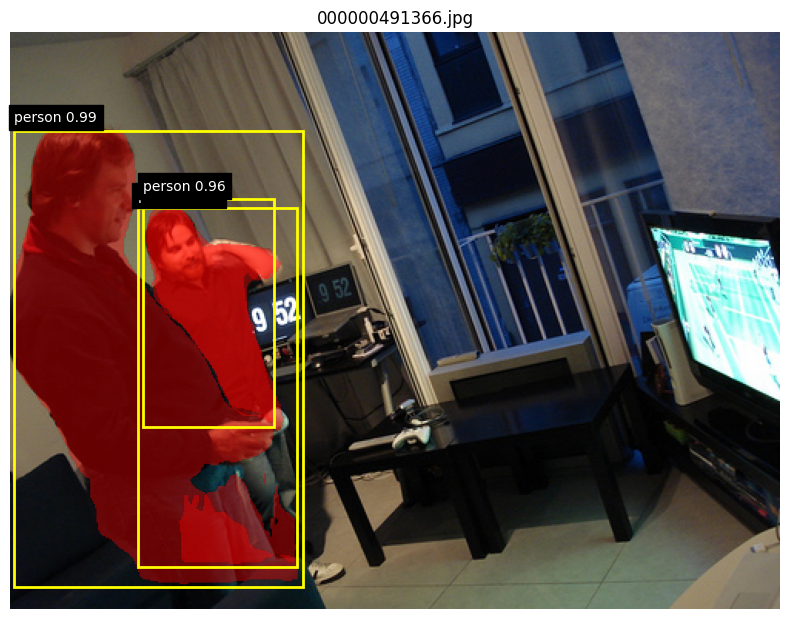

Saved: /content/test_preds/pred_000000491366.jpg


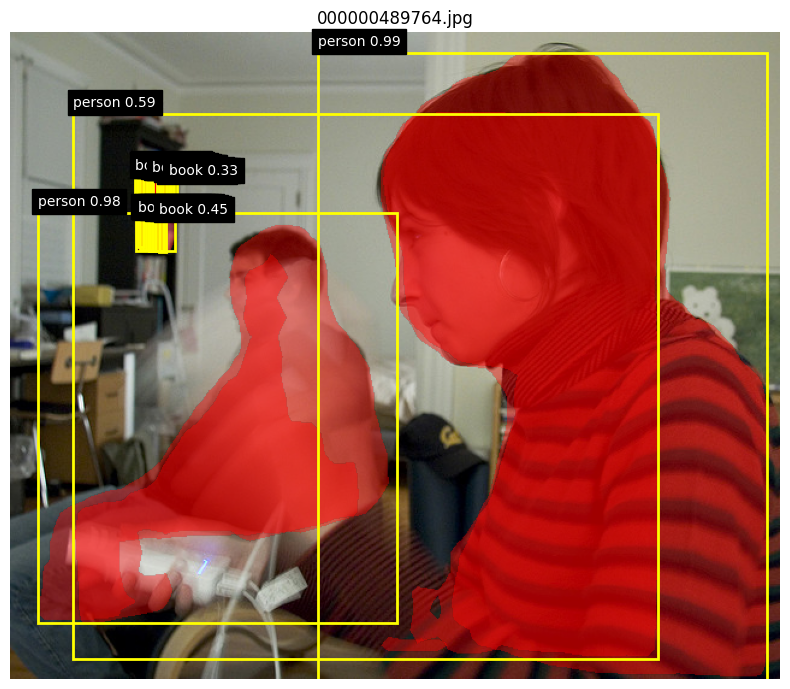

Saved: /content/test_preds/pred_000000489764.jpg


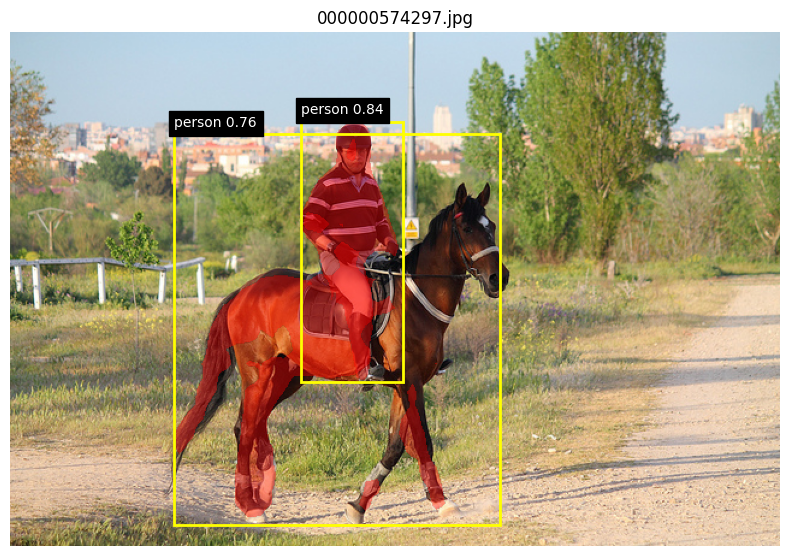

Saved: /content/test_preds/pred_000000574297.jpg

Saved test prediction images to: /content/test_preds


In [67]:
import os, random, matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

TEST_DIR = os.path.join(ROOT, "test-30")
out_dir = "/content/test_preds"
os.makedirs(out_dir, exist_ok=True)

test_files = sorted([f for f in os.listdir(TEST_DIR) if f.lower().endswith(('.jpg','.png'))])
chosen = random.sample(test_files, 3)
print("Chosen test files:", chosen)

def visualize_and_save_test(fname, model, device, save_path, conf_thresh=0.3):
    img_path = os.path.join(TEST_DIR, fname)
    img = Image.open(img_path).convert("RGB")
    inp = TF.to_tensor(img).to(device)
    model.eval()
    with torch.no_grad():
        out = model([inp])[0]
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    ax = plt.gca()
    if 'masks' in out and out['masks'].shape[0]>0:
        masks = (out['masks']>0.5).squeeze(1).cpu().numpy()
        boxes = out['boxes'].cpu().numpy()
        labels = out['labels'].cpu().numpy()
        scores = out['scores'].cpu().numpy()
        for i in range(len(masks)):
            if scores[i] < conf_thresh:
                continue
            mask = masks[i]
            colored_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)
            colored_mask[mask==1] = [255,0,0,100]
            ax.imshow(colored_mask)
            x1,y1,x2,y2 = boxes[i]
            ax.add_patch(plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, edgecolor='yellow', linewidth=2))
            cls = TARGET[labels[i]-1] if labels[i]-1 < len(TARGET) else str(labels[i])
            ax.text(x1, y1-6, f"{cls} {scores[i]:.2f}", color='white', fontsize=10, backgroundcolor='black')
    plt.axis('off')
    plt.title(fname)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

for fname in chosen:
    save_path = os.path.join(out_dir, f"pred_{fname}")
    visualize_and_save_test(fname, model, device, save_path, conf_thresh=0.3)
    print("Saved:", save_path)

print("\nSaved test prediction images to:", out_dir)